# Hospital Readmission Prediction | Casimir Uhlig
**Tomorrow University: IC**

---

## Context

The German healthcare system faces mounting financial pressure, with state insurance companies paying €102 billion in 2024 for hospital care. A significant portion stems from preventable readmissions and suboptimal discharge decisions.

Currently, German hospitals rely primarily on clinical judgment when deciding patient discharge and post-care monitoring. This project demonstrates how machine learning can enhance these decisions by identifying which patients can safely return home versus those requiring extended monitoring—while maintaining strict GDPR compliance.

**Impact**: Reduced costs, improved patient outcomes, and lives saved through evidence-based discharge decisions.

---

## Problem Statement

**Given** a diabetes patient's clinical history, demographics, and treatment data at hospital discharge,
**Predict** readmission status within 24 hours of discharge,
**To enable** targeted post-discharge monitoring that reduces unnecessary readmissions while ensuring high-risk patients receive appropriate care.

---

## Project Specifications

**Type**: Multiclass Classification

**Target Variable**:
- No readmission
- Readmission within 30 days
- Readmission after 30 days

**Prediction Horizon**:
- Features: Data available at discharge (T=0)
- Prediction window: 30-day readmission risk
- Execution: Within 24 hours pre-discharge for care coordination

---

## Hypothesis & Intended Impact


#### Hypothesis


### StakeHolder Table
| Impact Type | **Direct Impact** | **Indirect Impact** |
| :--- | :--- | :--- |
| **Benefit** | **Hospital Staff:** Optimized bed management and clearer discharge workflows. | **Taxpayers/Insurers:** Long-term stabilization of healthcare premiums due to lower system costs. |
| **Harm / Risk** | **Vulnerable Patients:** Risk of "algorithmic bias" where certain demographics are flagged for early discharge incorrectly. | **Medical Staff Autonomy:** Potential "automation bias" where doctors stop questioning the AI, leading to skill atrophy.*
* Benefits include optimized resource allocation, reduced healthcare costs, and better patient outcomes through targeted intervention.
* Harms could include discriminatory predictions affecting vulnerable populations or inappropriate early discharge leading to adverse health events.


## Dataset Discovery & Selection


#### Problems with finding a DataSet:
(Optional) A brief note on any challenges in finding or accessing suitable data, and how these challenges might affect the project.

#### Choosen DataSet: Diabetes 130 US hospitals for years 1999-2008

* Target Variable: A readmission in 30 Days
* Dataset download: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008
* Data set by: Clore, J., Cios, K., DeShazo, J., & Strack, B. (2014). Diabetes 130-US Hospitals for Years 1999-2008 [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5230J.

"""
Why this dataset?
"""

🗃️ Data Overview (~120 words)
List anticipated sources (e.g., "TrashNet images from Kaggle")
Estimate the 5 V’s: Volume, Variety, Velocity, Veracity, Value
Flag uncertainties for validation later

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# IMBLearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#Models
from xgboost import XGBClassifier

Import

In [3]:
data = pd.read_csv('data/diabetic_data.csv')

### Target

## Features Overview


| Variable Name | Role | Type | Description | Units | Missing Values |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **encounter_id** | ID | Integer | Unique identifier of an encounter | - | No |
| **patient_nbr** | ID | Integer | Unique identifier of a patient | - | No |
| **race** | Feature | Categorical | Caucasian, Asian, African American, Hispanic, and other | - | Yes |
| **gender** | Feature | Categorical | Male, female, and unknown/invalid | - | No |
| **age** | Feature | Categorical | Grouped in 10-year intervals: [0, 10) to [90, 100) | Years | No |
| **weight** | Feature | Categorical | Weight of the patient | Pounds | Yes |
| **admission_type_id** | Feature | Categorical | Integer identifier for 9 types (e.g., emergency, elective) | - | No |
| **discharge_disposition_id** | Feature | Categorical | Integer identifier for 29 types (e.g., home, expired) | - | No |
| **admission_source_id** | Feature | Categorical | Integer identifier for 21 sources (e.g., physician referral) | - | No |
| **time_in_hospital** | Feature | Integer | Days between admission and discharge | Days | No |
| **payer_code** | Feature | Categorical | Integer identifier for 23 types (e.g., Medicare, self-pay) | - | Yes |
| **medical_specialty** | Feature | Categorical | Specialty of admitting physician (84 distinct values) | - | Yes |
| **num_lab_procedures** | Feature | Integer | Number of lab tests performed during encounter | Count | No |
| **num_procedures** | Feature | Integer | Number of non-lab procedures performed | Count | No |
| **num_medications** | Feature | Integer | Number of distinct generic names administered | Count | No |
| **number_outpatient** | Feature | Integer | Outpatient visits in the preceding year | Count | No |
| **number_emergency** | Feature | Integer | Emergency visits in the preceding year | Count | No |
| **number_inpatient** | Feature | Integer | Inpatient visits in the preceding year | Count | No |
| **diag_1** | Feature | Categorical | Primary diagnosis (first 3 digits of ICD9) | - | Yes |
| **diag_2** | Feature | Categorical | Secondary diagnosis (first 3 digits of ICD9) | - | Yes |
| **diag_3** | Feature | Categorical | Additional secondary diagnosis (first 3 digits of ICD9) | - | Yes |
| **number_diagnoses** | Feature | Integer | Number of diagnoses entered to the system | Count | No |
| **max_glu_serum** | Feature | Categorical | Glucose serum test range (>200, >300, normal, none) | - | No |
| **A1Cresult** | Feature | Categorical | A1C test range (>8, >7, normal, none) | - | No |
| **metformin** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **repaglinide** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **nateglinide** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **chlorpropamide** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **glimepiride** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **acetohexamide** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **glipizide** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **glyburide** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **tolbutamide** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **pioglitazone** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **rosiglitazone** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **acarbose** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **miglitol** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **troglitazone** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **tolazamide** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **examide** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **citoglipton** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **insulin** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **glyburide-metformin** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **glipizide-metformin** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **glimepiride-pioglitazone** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **metformin-rosiglitazone** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **metformin-pioglitazone** | Feature | Categorical | Drug dosage change (up, down, steady, no) | - | No |
| **change** | Feature | Categorical | Indicates if there was a change in diabetic medications | - | No |
| **diabetesMed** | Feature | Categorical | Indicates if any diabetic medication was prescribed | - | No |
| **readmitted** | **Target** | Categorical | Days to inpatient readmission (<30, >30, No) | - | No |

### Missing Values
1. Find the columns with Missing Values
2. Drop the Weight, Max_glu_serum beacuse of to little data less then 20%
3. For 'medical_speciality' and 'payer_code' where we only have arround 50% of the data we just fill the lines with unknown.
4. Looking at (diag_1,diag_2,diag_3), (race), and (A1Cresults)

In [4]:
# 1. Replace '?' with NaN
df_replaced = data.replace('?', pd.NA)

# 2. Calculate counts and percentages
missing_counts = df_replaced.isnull().sum()
missing_pct = ((missing_counts / len(data)) * 100).round(2)

# 3. Combine into a DataFrame
missing_table = pd.concat([missing_counts, missing_pct], axis=1)
missing_table.columns = ['Number of Missing Values', 'Percentage (%)']

# 4. Filter for columns with missing values and sort
missing_table = missing_table[missing_table['Number of Missing Values'] > 0].sort_values(by='Number of Missing Values', ascending=False)

# Display the table
print(missing_table)

                   Number of Missing Values  Percentage (%)
weight                                98569           96.86
max_glu_serum                         96420           94.75
A1Cresult                             84748           83.28
medical_specialty                     49949           49.08
payer_code                            40256           39.56
race                                   2273            2.23
diag_3                                 1423            1.40
diag_2                                  358            0.35
diag_1                                   21            0.02


Through that Weight, A1Cresults, Max_glu_serum have very little data in the data set we will drop them


In [5]:
data.drop(columns=['weight', 'max_glu_serum'], inplace=True)

For 'medical_speciality' and 'payer_code' where we only have arround 50% of the data we just fill the lines with unknown.

In [6]:
data[['medical_specialty', 'payer_code']] = data[['medical_specialty', 'payer_code']].replace('?', np.nan)

# 2. Fill the missing values with 'notknown'
data[['medical_specialty', 'payer_code']] = data[['medical_specialty', 'payer_code']].fillna('notknown')

For A1Cresults put in all Missing Values None


In [7]:
# Replace '?' with 'None' for the A1 Cresult column
data['A1Cresult'] = data['A1Cresult'].replace(pd.NA, 'None')

Now looking at diag_3, diag_2 and diag_1

In [8]:
# 1. Total Missing (Count of '?')
total_missing_1 = (data['diag_1'] == '?').sum()
total_missing_2 = (data['diag_2'] == '?').sum()
total_missing_3 = (data['diag_3'] == '?').sum()

# 2. Justified Missing
# diag_1 is never justified missing
justified_1 = 0
# diag_2 is justified if number_diagnoses == 1
justified_2 = ((data['diag_2'] == '?') & (data['number_diagnoses'] == 1)).sum()
# diag_3 is justified if number_diagnoses <= 2
justified_3 = ((data['diag_3'] == '?') & (data['number_diagnoses'] <= 2)).sum()

# 3. Create the Table
audit_data = {
    'Metric': ['Total Missing Values', 'Justified Missing', 'Missing Data'],
    'diag_1': [total_missing_1, justified_1, total_missing_1 - justified_1],
    'diag_2': [total_missing_2, justified_2, total_missing_2 - justified_2],
    'diag_3': [total_missing_3, justified_3, total_missing_3 - justified_3]
}

audit_df = pd.DataFrame(audit_data).set_index('Metric')

# Display the table
print(audit_df)

                      diag_1  diag_2  diag_3
Metric                                      
Total Missing Values      21     358    1423
Justified Missing          0     219    1242
Missing Data              21     139     181


Deleting the Missing Data Rows

In [9]:
# 1. Drop rows where diag_1 is missing (never justified)
data = data[data['diag_1'] != '?']

# 2. Delete 'Missing Data' rows for diag_2
# (Keep if diag_2 is '?' ONLY when number_diagnoses is 1)
data = data[~((data['diag_2'] == '?') & (data['number_diagnoses'] > 1))]

# 3. Delete 'Missing Data' rows for diag_3
# (Keep if diag_3 is '?' ONLY when number_diagnoses <= 2)
data = data[~((data['diag_3'] == '?') & (data['number_diagnoses'] > 2))]

print("Rows with unjustified missing data have been deleted.")

#Replace the remaining '?' in the diagnosis columns with 'no_diag'
# At this stage, these are only the 'justified' missing values
data['diag_2'] = data['diag_2'].replace('?', 'no_diag')
data['diag_3'] = data['diag_3'].replace('?', 'no_diag')

Rows with unjustified missing data have been deleted.


Dropping missing Race Rows as Substituing would skew the data and Unknown would create hard to interpret categorie


In [10]:
# 2. Filter out rows where race is '?'
data = data[data['race'] != '?']

Check if there are Still Missing Values in the DataSet

In [11]:
# 1. Replace '?' with NaN to ensure they are counted
df_replaced = data.replace('?', pd.NA)

# 2. Calculate counts and percentages
missing_counts = df_replaced.isnull().sum()
missing_pct = ((missing_counts / len(data)) * 100).round(2)

# 3. Combine into a DataFrame
missing_table = pd.concat([missing_counts, missing_pct], axis=1)
missing_table.columns = ['Number of Missing Values', 'Percentage (%)']

# 4. Filter for columns with missing values
missing_table = missing_table[missing_table['Number of Missing Values'] > 0].sort_values(by='Number of Missing Values', ascending=False)

# 5. Conditional Print
if missing_table.empty:
    print("✅ No missing values detected")
else:
    print(missing_table)

✅ No missing values detected


Splitting the Data

0 (NO): The baseline (patient was not readmitted).

1 (>30): Patient was readmitted, but after a month.

2 (<30): The highest priority group (patient was readmitted within 30 days).

In [12]:
# 1. Identify the column again
target_col = 'readmitted'

# 2. Check for missing values (NaNs) in the target column
missing_count = data[target_col].isna().sum()
print(f"Missing Target Values: {missing_count}")
unique_values = data['readmitted'].unique()
print(f"Unique values found: {unique_values}")

target_mapping = {

'NO': 0,
'>30': 1,
'<30': 2
}

# 2. Apply the mapping to the readmitted column
data[target_col] = data[target_col].map(target_mapping)

Missing Target Values: 0
Unique values found: ['NO' '>30' '<30']


In [13]:
# 1. Define Target (y)
y = data.pop('readmitted')

============================================================================
## Data Transformation
============================================================================

* Which Numerical Features do we have?
* Which Categorial Features do we have? How can we group them.

Drop All Unnessery Columss


In [14]:
# Drop ID columns that don't help prediction
data = data.drop(columns=['encounter_id', 'patient_nbr'])

 Okay lets look more Closely on the Categorial Data from diag_1, diag_2 and Diag_3
ICD-9 Diagnosis Code Mapping Reference

| ICD-9 Code Range | Category Description |
| :--- | :--- |
| **001–139** | Infectious and Parasitic Diseases |
| **140–239** | Neoplasms |
| **240–279** | Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders |
| **280–289** | Diseases of the Blood and Blood-forming Organs |
| **290–319** | Mental Disorders |
| **320–389** | Diseases of the Nervous System and Sense Organs |
| **390–459** | Diseases of the Circulatory System |
| **460–519** | Diseases of the Respiratory System |
| **520–579** | Diseases of the Digestive System |
| **580–629** | Diseases of the Genitourinary System |
| **630–679** | Complications of Pregnancy, Childbirth, and the Puerperium |
| **680–709** | Diseases of the Skin and Subcutaneous Tissue |
| **710–739** | Diseases of the Musculoskeletal System and Connective Tissue |
| **740–759** | Congenital Anomalies |
| **760–779** | Certain Conditions originating in the Perinatal Period |
| **780–799** | Symptoms, Signs, and Ill-defined Conditions |
| **800–999** | Injury and Poisoning |
| **E and V codes** | External causes of injury and supplemental classification |

> **Source:** [Wikipedia - List of ICD-9 codes](https://en.wikipedia.org/wiki/List_of_ICD-9_codes)

In [15]:
# ==========================
# REFACTORED FUNCTIONS
# ==========================

def get_icd9_mapping():
    """Define lookup table for cleaner maintenance."""
    return [
        (1, 139, 'Infectious_Parasitic'),
        (140, 239, 'Neoplasms'),
        (240, 249, 'Endocrine_Non_Diabetes'),
        (250, 250, 'Diabetes'),
        (251, 279, 'Endocrine_Metabolic_Other'),
        (280, 289, 'Blood_Diseases'),
        (290, 319, 'Mental_Disorders'),
        (320, 389, 'Nervous_System'),
        (390, 459, 'Circulatory'), # Simplified for comorbidity logic
        (460, 519, 'Respiratory'),
        (580, 629, 'Genitourinary'), # Kidney-related
        (800, 999, 'Injury_Poisoning')
    ]

def categorize_icd9_vectorized(series):
    """Categorizes a series using vectorized logic."""
    val = pd.to_numeric(series, errors='coerce')
    result = pd.Series('Other', index=series.index)

    result[series.isna() | (series == 'no_diag')] = 'None'

    str_series = series.astype(str).str.upper()
    result[str_series.str.startswith(('E', 'V'))] = 'External_Supplemental'

    for start, end, label in get_icd9_mapping():
        mask = (val >= start) & (val <= end)
        result[mask] = label

    return result

def add_comorbidity_features(df, target_diags):
    """
    Vectorized comorbidity flag creation.
    Renamed parameter to 'target_diags' to avoid shadowing outer scope.
    """
    # Create boolean masks checking across all specified diagnosis columns
    # We use a copy to avoid SettingWithCopy warnings if df is a slice
    df = df.copy()

    is_circ = df[target_diags].stack().str.contains('Circulatory').unstack().any(axis=1)
    is_resp = df[target_diags].stack().str.contains('Respiratory').unstack().any(axis=1)
    is_kidney = df[target_diags].stack().str.contains('Genitourinary').unstack().any(axis=1)
    is_diab = df[target_diags].stack().str.contains('Diabetes').unstack().any(axis=1)

    df['has_circulatory'] = is_circ.astype(int)
    df['has_respiratory'] = is_resp.astype(int)
    df['has_kidney'] = is_kidney.astype(int)
    df['diabetes_complications'] = (is_diab & (is_circ | is_kidney)).astype(int)

    return df

# ==========================
# CLEAN EXECUTION
# ==========================
diag_cols = ['diag_1', 'diag_2', 'diag_3']

# Apply transformation using the outer scope list
for col in diag_cols:
    data[col] = categorize_icd9_vectorized(data[col])

# Pass the outer scope list into the local function parameter 'target_diags'
data = add_comorbidity_features(data, target_diags=diag_cols)

print("✅ ICD-9 Mapping and Comorbidity Flags Created.")
print(data[['has_circulatory', 'diabetes_complications']].head())

✅ ICD-9 Mapping and Comorbidity Flags Created.
   has_circulatory  diabetes_complications
0                0                       0
1                0                       0
2                0                       0
3                1                       0
4                0                       0


"""Merge rare circulatory subcategories into broader groups"""
Merge rare circulatory conditions into "Other Circulatory"

In [16]:
def refine_diagnosis_categories(df, columns):
    """
    Merges low-frequency ICD-9 categories into broader groups
    to reduce noise and improve model stability.
    """

    # Define the mapping: {Old_Value: New_Value}
    refinement_map = {
        # Rare Circulatory merges
        'Circulatory_Cerebrovascular': 'Circulatory_Other',
        'Circulatory_Rheumatic':       'Circulatory_Other',
        'Circulatory_Pulmonary':       'Circulatory_Other',
        'Circulatory_Arterial_Venous':  'Circulatory_Other',

        # Endocrine merges
        'Endocrine_Non_Diabetes':      'Endocrine_Metabolic_Other',

        # Rare/Noise categories
        'Congenital_Anomalies':        'Other'
    }

    # Perform the replacement across all specified columns at once
    df[columns] = df[columns].replace(refinement_map)

    return df

# ==========================
# EXECUTION
# ==========================
diag_cols = ['diag_1', 'diag_2', 'diag_3']
data = refine_diagnosis_categories(data, diag_cols)

# Quick verification of the new distribution
print("Refined Distribution (diag_1):")
print(data['diag_1'].value_counts().head(10))

Refined Distribution (diag_1):
diag_1
Other                        32837
Circulatory                  29625
Respiratory                  10156
Injury_Poisoning              6720
Genitourinary                 4980
Neoplasms                     3350
Infectious_Parasitic          2694
Endocrine_Metabolic_Other     2608
Mental_Disorders              2179
External_Supplemental         1607
Name: count, dtype: int64


STEP 2: GROUP ADMINISTRATIVE CODES
Purpose: Reduce high-cardinality administrative IDs to meaningful categories
Source: IDs_mapping.csv from UCI Diabetes dataset
Reference: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals

Group administrative codes into clinically/operationally meaningful categories.
All groupings based on official code mappings from dataset documentation
and validated against CMS (Centers for Medicare & Medicaid Services) definitions.


ADMISSION TYPE (How patient arrived)
Original: 8 categories → Grouped: 4 categories
Source: IDs_mapping.csv, admission_type_id column


In [17]:
def clean_admission_types(df, column='admission_type_id'):
    """Standardizes admission types into 4 high-level categories."""

    # 1. Define the explicit mapping (handles both strings and numeric IDs)
    admission_map = {
        '1': 'Emergency', 'Emergency': 'Emergency',
        '2': 'Urgent',    'Urgent':    'Urgent',
        '3': 'Elective',  'Elective':  'Elective'
    }

    # 2. Apply mapping
    # .map() replaces values based on the dict; non-matches become NaN
    # .fillna() handles 'Other' and 'Unknown' logic in one go
    df[column] = df[column].astype(str).map(admission_map).fillna('Other_Admission')

    # 3. Handle specific 'Unknown' cases if they were originally truly missing
    # (Optional: Only if you want to distinguish 'Unknown' from 'Other')
    df.loc[df[column].isna(), column] = 'Unknown'

    return df

# ==========================
# EXECUTION
# ==========================
if 'admission_type_id' in data.columns:
    data = clean_admission_types(data)

print("Admission Type breakdown:")
print(data['admission_type_id'].value_counts())

Admission Type breakdown:
admission_type_id
Emergency          52755
Elective           18469
Urgent             17728
Other_Admission    10297
Name: count, dtype: int64


 ----------------------------------------
 DISCHARGE DISPOSITION (Where patient went after hospital)
 ----------------------------------------
Original: 29 categories → Grouped: 6 categories
Clinical insight: WHERE you go post-discharge strongly predicts readmission
 Source: IDs_mapping.csv, discharge_disposition_id column

In [18]:
def clean_discharge_dispositions(df, column='discharge_disposition_id'):
    """Groups discharge IDs into clinically relevant outcome categories."""

    # 1. Define the mapping groups
    # This structure is much easier to verify against a data dictionary
    groups = {
        'Home': ['1', '6', '8'],
        'Continuing_Care': ['3', '4', '5', '22', '23', '24'],
        'Transfer_Acute': ['2', '10', '12', '15'],
        'AMA_Expired': ['7', '11', '19', '20', '21'],
        'Hospice': ['13', '14']
    }

    # 2. Flatten the dictionary for Pandas .map()
    # Logic: {'1': 'Home', '6': 'Home', '3': 'Continuing_Care', ...}
    discharge_map = {idx: category for category, ids in groups.items() for idx in ids}

    # 3. Apply the mapping
    # Convert to string to ensure IDs match, map, then fill remaining with 'Other'
    df[column] = df[column].astype(str).map(discharge_map).fillna('Other_Discharge')

    # 4. Handle actual nulls/empty strings as 'Unknown'
    mask_unknown = df[column].isna() | (df[column] == 'nan') | (df[column] == '')
    df.loc[mask_unknown, column] = 'Unknown'

    return df

# ==========================
# EXECUTION
# ==========================
if 'discharge_disposition_id' in data.columns:
    data = clean_discharge_dispositions(data)

print("Discharge Outcomes:")
print(data['discharge_disposition_id'].value_counts())

Discharge Outcomes:
discharge_disposition_id
Home               71399
Continuing_Care    17899
Other_Discharge     4831
AMA_Expired         2228
Transfer_Acute      2128
Hospice              764
Name: count, dtype: int64


REFINING DISCHARGE GROUPS

In [19]:
# Define the rare categories to be collapsed
rare_discharges = ['AMA_Expired', 'Hospice', 'Transfer_Acute']

# Collapse into 'Other_Discharge'
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(
    rare_discharges,
    'Other_Discharge'
)

# Verify the final distribution
print("Refined Discharge Outcomes:")
print(data['discharge_disposition_id'].value_counts())

Refined Discharge Outcomes:
discharge_disposition_id
Home               71399
Continuing_Care    17899
Other_Discharge     9951
Name: count, dtype: int64


----------------------------------------
ADMISSION SOURCE (Where patient came from)
----------------------------------------
Original: 21 categories → Grouped: 6 categories
Source: IDs_mapping.csv, admission_source_id column

In [20]:
def clean_admission_sources(df, column='admission_source_id'):
    """Groups admission source IDs into clean, logical categories."""

    # 1. Define groups
    groups = {
        'Physician_Referral': ['1', '2', '3'],
        'Transfer_Hospital':  ['4', '5', '6', '10', '18', '22', '25'],
        'Emergency_Room':     ['7'],
        'Court_Law':          ['8', '9'],
        'Transfer_Facility':  ['11', '12', '13', '14']
    }

    # 2. Flatten for the map
    source_map = {idx: cat for cat, ids in groups.items() for idx in ids}

    # 3. Apply transformation
    # Convert to string, map, and default to 'Other_Source'
    df[column] = df[column].astype(str).map(source_map).fillna('Other_Source')

    # 4. Cleanup 'Unknown'
    mask_unknown = df[column].isna() | (df[column].isin(['nan', '', 'None']))
    df.loc[mask_unknown, column] = 'Unknown'

    return df

# ==========================
# EXECUTION
# ==========================
if 'admission_source_id' in data.columns:
    data_grouped = clean_admission_sources(data)

print("Admission Source Categories:")
print(data['admission_source_id'].value_counts())

Admission Source Categories:
admission_source_id
Emergency_Room        56568
Physician_Referral    29994
Other_Source           6856
Transfer_Hospital      5760
Court_Law                66
Transfer_Facility         5
Name: count, dtype: int64


REFINING ADMISSION SOURCES

In [21]:

# Court_Law (66) and Transfer_Facility (5) are too rare for statistical significance
rare_sources = ['Court_Law', 'Transfer_Facility']

# Merge into 'Other_Source'
data['admission_source_id'] = data['admission_source_id'].replace(
    rare_sources,
    'Other_Source'
)

# Verify the final distribution
print("Refined Admission Source Distribution:")
print(data['admission_source_id'].value_counts())

Refined Admission Source Distribution:
admission_source_id
Emergency_Room        56568
Physician_Referral    29994
Other_Source           6927
Transfer_Hospital      5760
Name: count, dtype: int64


----------------------------------------
PAYER CODE (Insurance type)
----------------------------------------
Original: 18 categories → Grouped: 5 categories
Rationale: Insurance type indicates socioeconomic factors and access to care

In [22]:
def clean_payer_codes(df, column='payer_code'):
    """Vectorized categorization of insurance types based on string patterns."""

    # 1. Clean the series: fill NaNs and ensure uppercase for matching
    s = df[column].fillna('Unknown').astype(str).str.upper()

    # 2. Define our conditions (the "if" statements)
    conditions = [
        s.str.contains('MC|MEDICARE'),
        s.str.contains('MD|MEDICAID'),
        s.str.contains('BC|BLUE|HM|COMMERCIAL|PO|UN'),
        s.str.contains('SP|SELF')
    ]

    # 3. Define the corresponding choices (the "return" values)
    choices = [
        'Medicare',
        'Medicaid',
        'Commercial',
        'Self_Pay'
    ]

    # 4. Execute using np.select(conditions, choices, default)
    df[column] = np.select(conditions, choices, default='Other_Insurance')

    # 5. Clean up the explicit 'Unknown' cases
    df.loc[s == 'UNKNOWN', column] = 'Unknown'

    return df

# ==========================
# EXECUTION
# ==========================
if 'payer_code' in data.columns:
    data_grouped = clean_payer_codes(data)

print("Payer Category Distribution:")
print(data['payer_code'].value_counts())

Payer Category Distribution:
payer_code
Other_Insurance    46123
Medicare           31493
Commercial         13467
Self_Pay            4746
Medicaid            3420
Name: count, dtype: int64


----------------------------------------
MEDICATION COLUMNS
----------------------------------------
Original: 3-4 categories per drug ('No', 'Steady', 'Up', 'Down')
Grouped: Binary ('No', 'Yes')
Rationale: For readmission prediction, what matters is whether medication
was prescribed, not the specific dosage direction

In [24]:
def binarize_medications(df, medication_keywords=None):
    """
    Converts medication dosage columns to binary 'Yes'/'No' indicators.
    """
    # Create a local copy to avoid modifying the original dataframe unexpectedly
    df_local = df.copy()

    if medication_keywords is None:
        medication_keywords = ['metformin', 'insulin', 'glipizide', 'glyburide', 'pioglitazone']

    # 1. Identify columns locally
    med_cols_local = [
        col for col in df_local.columns
        if any(med in col.lower() for med in medication_keywords)
    ]

    # 2. Apply vectorized replacement
    for col in med_cols_local:
        # np.where is an external library (numpy), so ensure it's imported as np
        is_no = df_local[col].isna() | df_local[col].astype(str).str.lower().isin(['no', '', 'nan'])
        df_local[col] = np.where(is_no, 'No', 'Yes')

    return df_local, med_cols_local

# ==========================
# EXECUTION (Fixed Scope)
# ==========================
# We pass 'data' in and re-assign the result back to 'data'
# OR use a consistent name for the rest of the script.
data, med_cols = binarize_medications(data)

print(f"✅ Binarized {len(med_cols)} medication columns.\n")
print("Unique value counts per medication:")

# Now 'col' is correctly referencing the updated 'data' in the outer scope
for col in med_cols:
    counts = data[col].value_counts()
    # Format: Medication Name: Yes (count), No (count)
    print(f"  - {col:15}: {dict(counts)}")

✅ Binarized 10 medication columns.

Unique value counts per medication:
  - metformin      : {'No': np.int64(79777), 'Yes': np.int64(19472)}
  - glipizide      : {'No': np.int64(86884), 'Yes': np.int64(12365)}
  - glyburide      : {'No': np.int64(88899), 'Yes': np.int64(10350)}
  - pioglitazone   : {'No': np.int64(92093), 'Yes': np.int64(7156)}
  - insulin        : {'Yes': np.int64(52885), 'No': np.int64(46364)}
  - glyburide-metformin: {'No': np.int64(98571), 'Yes': np.int64(678)}
  - glipizide-metformin: {'No': np.int64(99236), 'Yes': np.int64(13)}
  - glimepiride-pioglitazone: {'No': np.int64(99248), 'Yes': np.int64(1)}
  - metformin-rosiglitazone: {'No': np.int64(99249)}
  - metformin-pioglitazone: {'No': np.int64(99248), 'Yes': np.int64(1)}


DROPPING NEAR-ZERO VARIANCE MEDICATIONS

Define a minimum threshold of 'Yes' values to keep a column
For 100k rows, even 10-20 is very low, but it's safer than 1!

In [25]:
min_yes_threshold = 1000

cols_to_drop = []

for col in med_cols:
    yes_count = (data[col] == 'Yes').sum()
    if yes_count < min_yes_threshold:
        cols_to_drop.append(col)

# Drop from the DataFrame
data = data.drop(columns=cols_to_drop)

# Update our med_cols list so it stays accurate for the ColumnTransformer
med_cols = [c for c in med_cols if c not in cols_to_drop]

print(f"✂️ Dropped {len(cols_to_drop)} rare/empty medication columns.")
print(f"Remaining medication columns: {len(med_cols)}")
if cols_to_drop:
    print(f"Dropped: {cols_to_drop}")

✂️ Dropped 5 rare/empty medication columns.
Remaining medication columns: 5
Dropped: ['glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


Rest of the Batch OneHot Encoding

In [26]:
# 1. Clean Feature Selection
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
            drop='first'
        ), categorical_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False  # Crucial for clean column names
)

# 2. Fit and Transform
# X already has IDs and Target removed, so we pass it directly
data_encoded = ct.fit_transform(data)

# 3. Reconstruct DataFrame with clean names
# get_feature_names_out() combined with verbose_feature_names_out=False
# gives us 'race_Caucasian' instead of 'cat__race_Caucasian'
df_final = pd.DataFrame(
    data_encoded,
    columns=ct.get_feature_names_out(),
    index=data.index
)

# 4. Success Verification
print(f"✅ One-Hot Encoding Successful")
print(f"   - Input Shape:  {data.shape}")
print(f"   - Output Shape: {df_final.shape}")
print("-" * 35)
print(f"Sample of New Features:\n{df_final.columns[df_final.columns.str.contains('_')][:5].tolist()}")

✅ One-Hot Encoding Successful
   - Input Shape:  (99249, 44)
   - Output Shape: (99249, 185)
-----------------------------------
Sample of New Features:
['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Male']


In [27]:
# Final check for any lingering nulls/missing markers
remaining_missing = (df_final == '?').sum().sum() + df_final.isnull().sum().sum()

if remaining_missing == 0:
    print("✅ Clean: 0 missing values.")
    print(f"✅ Features: {df_final.shape[1]}")
    print(f"✅ Rows: {df_final.shape[0]}")
else:
    print(f"⚠️ Warning: Still found {remaining_missing} missing values!")

✅ Clean: 0 missing values.
✅ Features: 185
✅ Rows: 99249


## Splitting the Data

In [28]:
# 2. Create a final 'Holdout' test set (20%)
# The remaining 80% (X_train_full) will be used for your K-Fold tests
X_train_full, X_test, y_train_full, y_test = train_test_split(
    df_final, y, test_size=0.20, random_state=42, stratify=y
)

print(f"Data ready for K-Fold: {X_train_full.shape}")
print(f"Final Holdout set: {X_test.shape}")

Data ready for K-Fold: (79399, 185)
Final Holdout set: (19850, 185)


## EDA
==


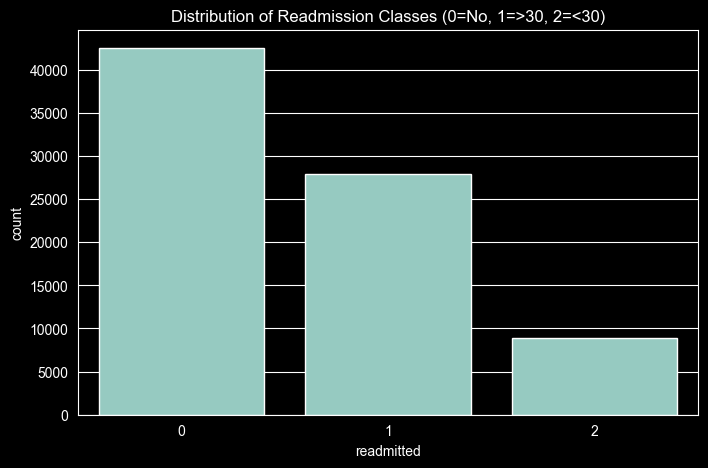

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_full)
plt.title('Distribution of Readmission Classes (0=No, 1=>30, 2=<30)')
plt.show()

/Users/casimircasparuhlig/Library/Python/3.11/lib/python/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/casimircasparuhlig/Library/Python/3.11/lib/python/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


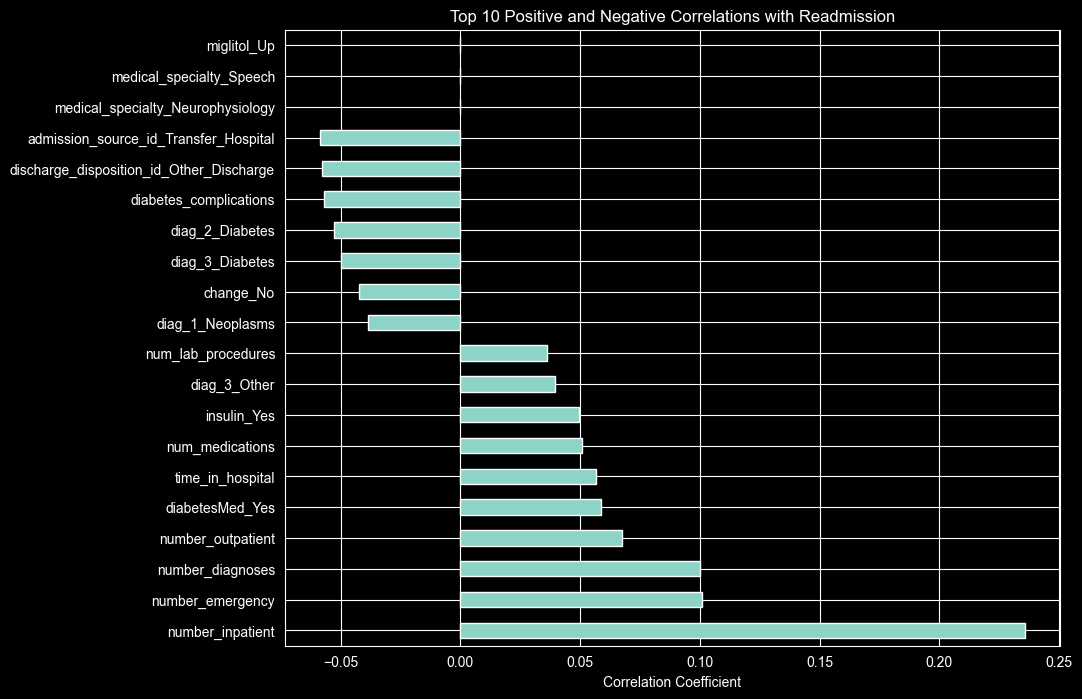

In [30]:
# Calculate correlation of all features with the target
correlations = X_train_full.corrwith(y_train_full).sort_values(ascending=False)

# Plot the top and bottom 10 correlations
top_features = pd.concat([correlations.head(10), correlations.tail(10)])
plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.title('Top 10 Positive and Negative Correlations with Readmission')
plt.xlabel('Correlation Coefficient')
plt.show()

## Regression Model
==
1. Create a Pipeline
* Step 1: Scale the data (Crucial for Logistic Regression)
* Step 2: Run the Model


## Baseline Model

In [31]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        max_iter=1000,
        solver='lbfgs',
        class_weight='balanced'
        # 'multi_class' removed to avoid FutureWarning
    ))
])

# 2. Setup K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 3. Execute Cross-Validation
# We use 'accuracy' as a baseline, but 'f1_weighted' is better for imbalanced data
cv_results = cross_val_score(pipeline, X_train_full, y_train_full, cv=kf, scoring='accuracy')

# 4. Results
print(f"Logistic Regression 10-Fold Accuracy: {np.mean(cv_results):.4f} (+/- {np.std(cv_results):.4f})")

Logistic Regression 10-Fold Accuracy: 0.4878 (+/- 0.0049)


--- Classification Report ---
              precision    recall  f1-score   support

          No       0.67      0.58      0.62     10631
         >30       0.47      0.39      0.42      6991
         <30       0.19      0.41      0.26      2228

    accuracy                           0.49     19850
   macro avg       0.44      0.46      0.43     19850
weighted avg       0.54      0.49      0.51     19850



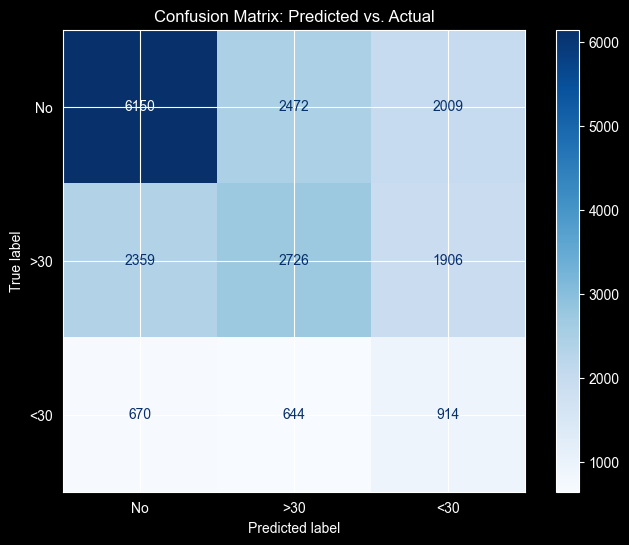

In [32]:
# 1. Fit the pipeline on the full training data
pipeline.fit(X_train_full, y_train_full)

# 2. Predict on the unseen test set
y_pred = pipeline.predict(X_test)

# 3. Print the detailed report
print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No', '>30', '<30']))

# 4. Plot the Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['No', '>30', '<30'],
                                        cmap='Blues', ax=ax)
plt.title('Confusion Matrix: Predicted vs. Actual')
plt.show()

In [33]:
# 1. Create a specialized Imbalance Pipeline
# This ensures SMOTE is ONLY applied during the 'fit' (training) phase
smote_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

# 2. Fit the model
smote_pipeline.fit(X_train_full, y_train_full)

# 3. Predict and Evaluate
y_pred_smote = smote_pipeline.predict(X_test)

print("--- SMOTE + Logistic Regression Report ---")
print(classification_report(y_test, y_pred_smote, target_names=['No', '>30', '<30']))

--- SMOTE + Logistic Regression Report ---
              precision    recall  f1-score   support

          No       0.66      0.58      0.62     10631
         >30       0.46      0.36      0.41      6991
         <30       0.18      0.40      0.25      2228

    accuracy                           0.48     19850
   macro avg       0.43      0.45      0.42     19850
weighted avg       0.54      0.48      0.50     19850



## Trying Different Models


In [34]:
# 1. Initialize the XGBoost Classifier
# We'll use 'multi:softmax' for 3-class prediction
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softmax',
    num_class=3,
    random_state=42,
    tree_method='hist' # Makes training much faster for 80k rows
)

# Convert all features to float
X_train_full = X_train_full.astype(float)
X_test = X_test.astype(float)

def clean_column_names(df):
    # This regex replaces [, ], and < with _
    new_cols = [re.sub(r'[\[\]<]', '_', col) for col in df.columns]
    df.columns = new_cols
    return df

# Apply to both train and test sets
X_train_full = clean_column_names(X_train_full)
X_test = clean_column_names(X_test)

print("Column names sanitized. New names look like:", X_train_full.columns[:5].tolist())

# Now try running the XGBoost model again
print("Data types converted. Starting XGBoost training...")
# 2. Fit the model
# Note: XGBoost is smart, but it still benefits from our previous work
print("Training XGBoost... this might take 1-2 minutes.")
xgb_model.fit(X_train_full, y_train_full)

# 3. Predict and Evaluate
y_pred_xgb = xgb_model.predict(X_test)

print("\n--- XGBoost Report ---")
print(classification_report(y_test, y_pred_xgb, target_names=['No', '>30', '<30']))

Column names sanitized. New names look like: ['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Male']
Data types converted. Starting XGBoost training...
Training XGBoost... this might take 1-2 minutes.

--- XGBoost Report ---
              precision    recall  f1-score   support

          No       0.61      0.85      0.71     10631
         >30       0.51      0.37      0.43      6991
         <30       0.46      0.02      0.04      2228

    accuracy                           0.59     19850
   macro avg       0.53      0.41      0.40     19850
weighted avg       0.56      0.59      0.54     19850



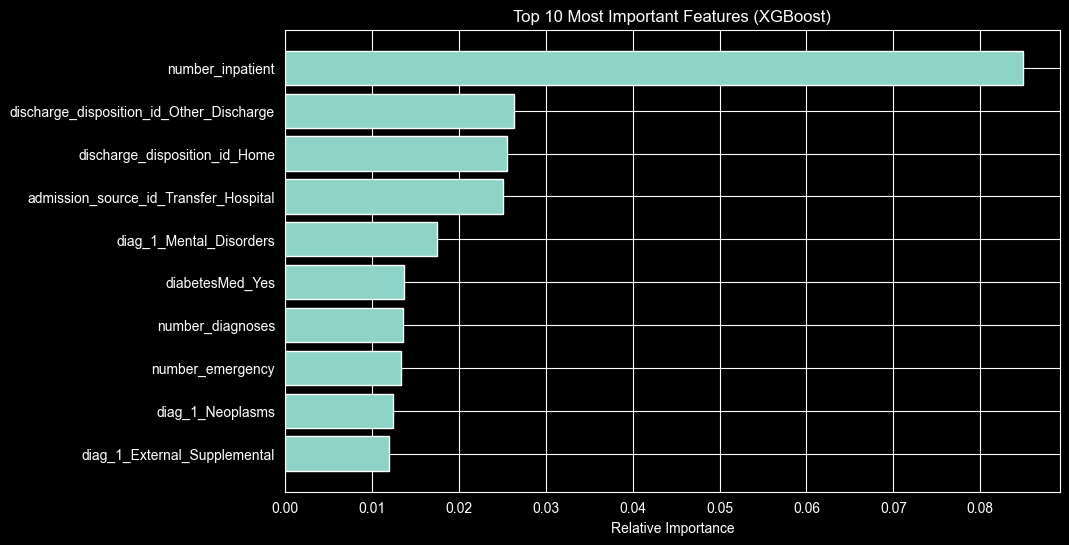

In [35]:
# Get feature importance
importances = xgb_model.feature_importances_
feature_names = X_train_full.columns
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title('Top 10 Most Important Features (XGBoost)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [36]:
# 1. Define the Binary Mapping
binary_mapping = {
    0: 0,  # 'NO' remains 0
    1: 1,  # '>30' becomes 1
    2: 1   # '<30' becomes 1
}

# 2. Apply the mapping to the labels
# Note: Since your y labels are already 0, 1, 2 from the previous step:
y_train_binary = y_train_full.map(binary_mapping)
y_test_binary = y_test.map(binary_mapping)

print("New Target Distribution (Train):")
print(y_train_binary.value_counts())

New Target Distribution (Train):
readmitted
0    42522
1    36877
Name: count, dtype: int64


Training Binary Logistic Regression Baseline...

--- Binary Logistic Regression Report ---
                precision    recall  f1-score   support

Not Readmitted       0.65      0.67      0.66     10631
    Readmitted       0.61      0.59      0.60      9219

      accuracy                           0.63     19850
     macro avg       0.63      0.63      0.63     19850
  weighted avg       0.63      0.63      0.63     19850



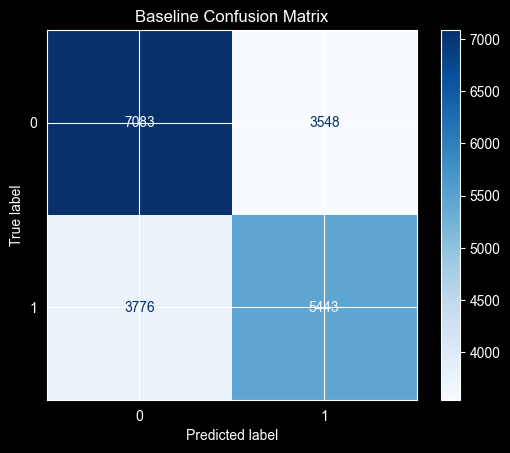

In [37]:
# 1. Create the Binary Pipeline
# Using class_weight='balanced' to handle the 0/1 imbalance
binary_logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
    max_iter=1000,
    solver='saga',  # saga supports L1
    penalty='l1',   # L1 regularization
    C=0.1,          # Stronger regularization (lower C = more regularization)
    class_weight='balanced',
    random_state=42
    ))
])

# 2. Fit the model
print("Training Binary Logistic Regression Baseline...")
binary_logreg_pipeline.fit(X_train_full, y_train_binary)

# 3. Predict
y_pred_bin_log = binary_logreg_pipeline.predict(X_test)

# 4. Results
print("\n--- Binary Logistic Regression Report ---")
print(classification_report(y_test_binary, y_pred_bin_log, target_names=['Not Readmitted', 'Readmitted']))

# 5. Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_binary, y_pred_bin_log, cmap='Blues')
plt.title('Baseline Confusion Matrix')
plt.show()

/var/folders/dj/mn6229p97s99ftdv_bdyz9cc0000gn/T/ipykernel_2446/217851096.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


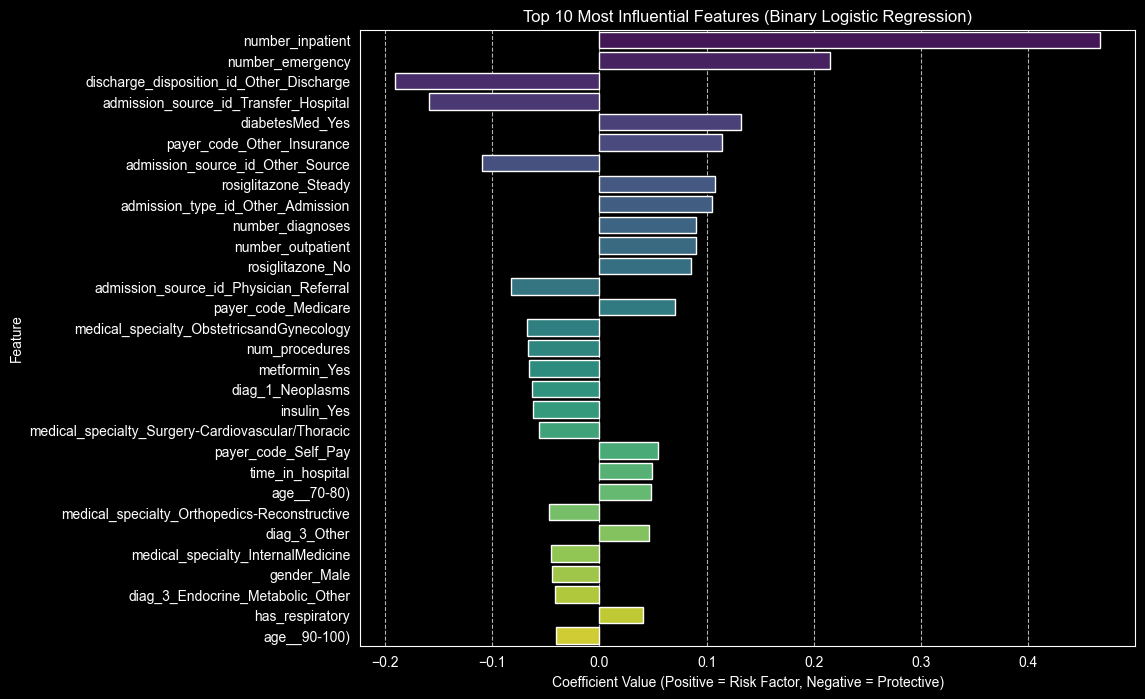

                                               Feature  Coefficient
179                                   number_inpatient     0.466502
178                                   number_emergency     0.215202
19            discharge_disposition_id_Other_Discharge    -0.190400
22               admission_source_id_Transfer_Hospital    -0.159177
172                                    diabetesMed_Yes     0.131833
25                          payer_code_Other_Insurance     0.114129
20                    admission_source_id_Other_Source    -0.109512
159                               rosiglitazone_Steady     0.107796
16                   admission_type_id_Other_Admission     0.104920
180                                   number_diagnoses     0.089945
177                                  number_outpatient     0.089767
158                                   rosiglitazone_No     0.085278
21              admission_source_id_Physician_Referral    -0.082559
24                                 payer_code_Me

In [38]:
# 1. Access the logreg model from the pipeline
logreg_model = binary_logreg_pipeline.named_steps['logreg']

# 2. Get the coefficients (weights)
# Since it's binary, it has one set of coefficients in index [0]
coefficients = logreg_model.coef_[0]
feature_names = X_train_full.columns

# 3. Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# 4. Get the Top 10 by absolute impact
top_10_features = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(30)

# 5. Plotting
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_10_features,
    x='Coefficient',
    y='Feature',
    palette='viridis'
)
plt.title('Top 10 Most Influential Features (Binary Logistic Regression)')
plt.xlabel('Coefficient Value (Positive = Risk Factor, Negative = Protective)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Print the values for exact reading
print(top_10_features[['Feature', 'Coefficient']])

In [39]:
# Use the binary target for the report
print("--- Binary Baseline Performance ---")
print(classification_report(y_test_binary, y_pred_bin_log, target_names=['Not Readmitted', 'Readmitted']))

--- Binary Baseline Performance ---
                precision    recall  f1-score   support

Not Readmitted       0.65      0.67      0.66     10631
    Readmitted       0.61      0.59      0.60      9219

      accuracy                           0.63     19850
     macro avg       0.63      0.63      0.63     19850
  weighted avg       0.63      0.63      0.63     19850



### Decision Tree

In [ ]:
# Initialize and Fit
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
dt_model.fit(X_train_full, y_train_binary)

# Extract and Plot Importance
dt_importances = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=dt_importances, x='Importance', y='Feature', palette='magma')
plt.title('Top 15 Features: Decision Tree')
plt.show()

### RandomForest

In [ ]:
# Initialize and Fit
rf_model = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_full, y_train_binary)

# Extract and Plot Importance
rf_importances = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importances, x='Importance', y='Feature', palette='plasma')
plt.title('Top 15 Features: Random Forest')
plt.show()

### XGBoost

In [ ]:
# Initialize and Fit
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_full, y_train_binary)

# Extract and Plot Importance
# Note: XGBoost has different types of importance; 'gain' is usually the most useful
xgb_importances = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Features: XGBoost')
plt.show

In [47]:
# 1. Define the models with SMOTE inside the pipeline
# The order is: Scale -> SMOTE (on training only) -> Model
models = {
    "Logistic Regression (SMOTE)": ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(max_iter=1000, class_weight=None, solver='liblinear'))
    ]),
    "Decision Tree (SMOTE)": ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', DecisionTreeClassifier(max_depth=10, random_state=42))
    ]),
    "Random Forest (SMOTE)": ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42))
    ]),
    "XGBoost (SMOTE)": ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, eval_metric='logloss', random_state=42))
    ])
}

# 2. Comparison Loop
comparison_list = []

print("🚀 Starting Model Comparison with SMOTE...\n")

for name, pipeline in models.items():
    # Fit the pipeline
    # (Scales Train, SMOTEs Train, Fits Model)
    pipeline.fit(X_train_full, y_train_binary)

    # Predict
    # (Scales Test using Train params, SMOTE is ignored here)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Metrics
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test_binary, y_pred),
        "Recall (Sensitivity)": recall_score(y_test_binary, y_pred),
        "F1-Score": f1_score(y_test_binary, y_pred),
        "AUC-ROC": roc_auc_score(y_test_binary, y_proba)
    }

    comparison_list.append(metrics)
    print(f"✅ {name} completed.")

# 3. Results DataFrame
results_df = pd.DataFrame(comparison_list).set_index("Model").sort_values(by="F1-Score", ascending=False)
display(results_df.style.highlight_max(color='lightgreen', axis=0))

🚀 Starting Model Comparison with SMOTE...

✅ Logistic Regression (SMOTE) completed.
✅ Decision Tree (SMOTE) completed.
✅ Random Forest (SMOTE) completed.
✅ XGBoost (SMOTE) completed.


,Accuracy,Recall (Sensitivity),F1-Score,AUC-ROC
Model,,,,
Logistic Regression (SMOTE),0.629723,0.593448,0.598185,0.674426
Random Forest (SMOTE),0.636222,0.540623,0.579906,0.682657
XGBoost (SMOTE),0.639244,0.516976,0.571018,0.688289
Decision Tree (SMOTE),0.629018,0.500814,0.556332,0.661626


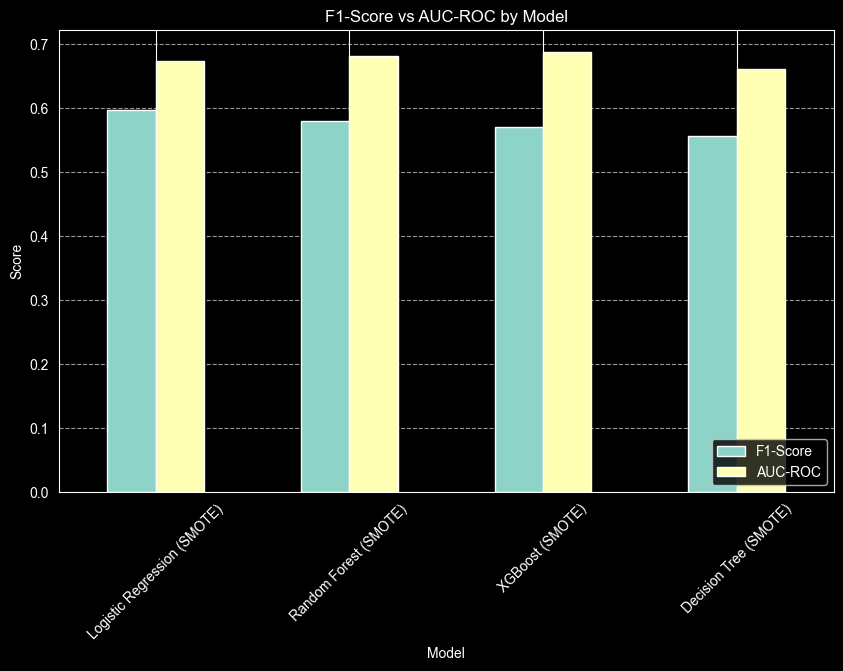

In [48]:
results_df[['F1-Score', 'AUC-ROC']].plot(kind='bar', figsize=(10, 6))
plt.title('F1-Score vs AUC-ROC by Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()